<a href="https://colab.research.google.com/github/lucasgrezzi/MyProjects/blob/main/var_sarscov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação dos programas necessários
---



In [ ]:
!pip install biopython pandas matplotlib ete3

Se for usar o NCBI, você pode baixar sequências genômicas com o Biopython:

In [ ]:
from Bio import Entrez, SeqIO

Entrez.email = "lucasgrezzi@gmail.com"  # Defina seu e-mail para acesso ao NCBI

# Buscar sequências do SARS-CoV-2 de um país específico
search_query = "SARS-CoV-2[Organism] AND Brazil[Location] AND 2023[Publication Date]"
handle = Entrez.esearch(db="nucleotide", term=search_query, retmax=10)
record = Entrez.read(handle)
ids = record["IdList"]

# Baixar as sequências
sequences = []
for seq_id in ids:
    handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
    seq_record = SeqIO.read(handle, "fasta")
    sequences.append(seq_record)

# Salvar em um arquivo FASTA
SeqIO.write(sequences, "sars_cov2_sequences.fasta", "fasta")


(Custalo) Após baixar os genomas, um alinhamento é necessário para detectar mutações.

In [ ]:
!apt install clustalo -y

In [ ]:
clustal_cline = ClustalOmegaCommandline(infile="sars_cov2_sequences.fasta",
                                        outfile="sars_cov2_aligned.fasta",
                                        verbose=True, auto=True, threads=1)

stdout, stderr = clustal_cline()
print(stdout)

Identificação de Mutações

Podemos comparar as sequências alinhadas com a sequência de referência Wuhan-Hu-1 para encontrar mutações:

In [ ]:
from Bio import AlignIO

alignment = AlignIO.read("sars_cov2_aligned.fasta", "fasta")
reference = alignment[0].seq  # Primeira sequência como referência

# Comparar com outras sequências
for record in alignment[1:]:
    diffs = [i for i in range(len(reference)) if reference[i] != record.seq[i]]
    print(f"{record.id} tem {len(diffs)} mutações nas posições {diffs}")

Instalar o IQ-TREE corretamente no Google Colab

No seu notebook do Google Colab, rode o seguinte código:




In [ ]:
# Baixar e extrair o IQ-TREE
!wget https://github.com/iqtree/iqtree2/releases/download/v2.2.2.7/iqtree-2.2.2.7-Linux.tar.gz
!tar -xvf iqtree-2.2.2.7-Linux.tar.gz

# Mover o executável correto para um diretório acessível
!mv iqtree-2.2.2.7-Linux/bin/iqtree2 /usr/local/bin/iqtree
!chmod +x /usr/local/bin/iqtree


Agora você pode rodar a análise filogenética com o IQ-TREE usando seu alinhamento:



In [ ]:
!iqtree -s sars_cov2_aligned.fasta -m HKY+G -bb 1000 -nt AUTO


Visualizar os Dados com Matplotlib e Biopython
Se quiser algo mais simples, podemos usar o Matplotlib para exibir a árvore de forma básica:

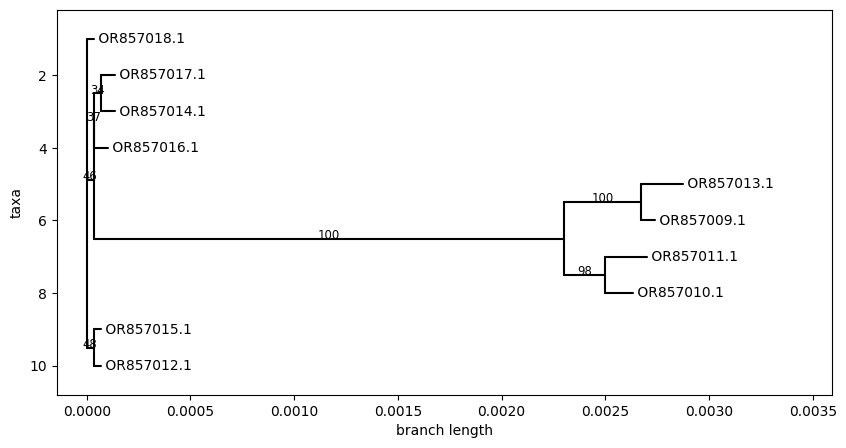

In [ ]:
import matplotlib.pyplot as plt
from Bio import Phylo

# Carregar a árvore gerada pelo IQ-TREE
tree = Phylo.read("sars_cov2_aligned.fasta.treefile", "newick")

# Criar figura
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# Desenhar árvore
Phylo.draw(tree, axes=ax)


In [ ]:
from google.colab import files
files.download("sars_cov2_aligned.fasta.treefile")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>